In [2]:
# Plot images inline - not needed in Python
%matplotlib inline

In [3]:
# Import the cf and cfplot packages
import cf
import cfplot as cfp

In [8]:
# Read in ncas_data/data2.nc (use the read_field function)
data2 = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/data2.nc')[0]

In [9]:
# Examine the the data to see what fields are in the dataset and check the resolution
print(data2)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



In [10]:
# Read in ncas_data/data3.nc (use the read_field function)
data3 = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/data3.nc')[0]

In [11]:
# Examine the data similarly
print(data3)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : long_name=latitude(256) = [89.46294403076172, ..., -89.46294403076172] degrees_north
                : long_name=longitude(512) = [0.0, ..., 359.296875] degrees_east



In [13]:
# Try regridding the data3.nc field to the grid of data2.nc using the 'conservative' regridding method
# - observe the resulting error
#regrid3 = data3.regrids(data2, method='conservative')
#need contiuous overlapping bounds

In [14]:
# Regrid data3.nc to the grid of data2.nc using the 'bilinear' regridding method
regrid3_bi = data3.regrids(data2, method='bilinear')


In [15]:
# Examine the result to check it is on the new grid
print(regrid3_bi)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



In [16]:
# Find the difference between data2.nc and the regridded field
diff = data2 - regrid3_bi

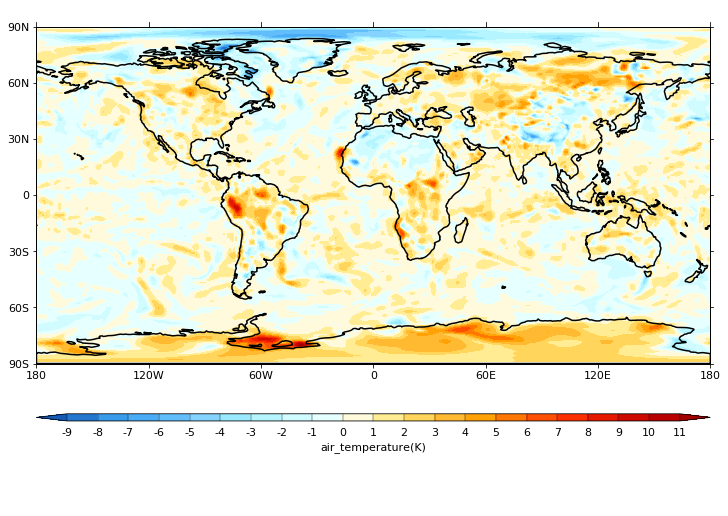

In [18]:
# Make a contour plot of this difference
cfp.con(diff, lines=False)

In [22]:
# Get the latitude and longitude coordinates of data2.nc using the field's coord method
lon2 = data2.coord('X')
#print(lon2.array)
lat2 = data2.coord('Y')

In [27]:
# Create Voronoi bounds for each of the coordinates (use the coordinate's get_bounds method with create=True and
# insert=True)
lon2.create_bounds()
lat2.create_bounds()

<Bounds: (160, 2) degrees_north>

In [28]:
# Perform the same operations for the field from data3.nc
lon3 = data3.coord('X')
lat3 = data3.coord('Y')
lon3.create_bounds()
lat3.create_bounds()

<Bounds: (256, 2) degrees_north>

In [29]:
# Regrid data3.nc to the grid of data2.nc using the 'conservative' regridding method
regrid3_con = data3.regrids(data2, method='conservative')

ValueError: Source coordinates must have contiguous, non-overlapping bounds for conservative regridding.

In [ ]:
# Plot the difference between data2.nc and the regridded field



In [ ]:
# Try to find the difference between the conservatively regridded field and the bilinearly regridded field
# - observe the error



In [ ]:
# The error occurs because the conservatively regridded field's latitute has bounds, but the bilinearly regridded field's
# does not - delete the conservatively regridded field's latitude and longitude bounds by using del on the coordinates'
# bounds properties



In [ ]:
# Plot the difference between the conservatively regridded field and the bilinearly regridded field

